# Shopify Fall 2021 Data Science Intern Challenge

- Yuanfeng Li
- 5/7/2021

# Analyzing data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

shopify_df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [2]:
shopify_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,3/13/2017 12:36
1,2,92,925,90,1,cash,3/3/2017 17:38
2,3,44,861,144,1,cash,3/14/2017 4:23
3,4,18,935,156,1,credit_card,3/26/2017 12:43
4,5,18,883,156,1,credit_card,3/1/2017 4:35


In [3]:
# see if AOV of $3145.13 is correct
shopify_df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

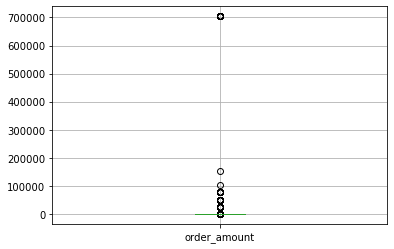

In [4]:
# lets see what is the distribution from boxplot
shopify_df.boxplot(column='order_amount')

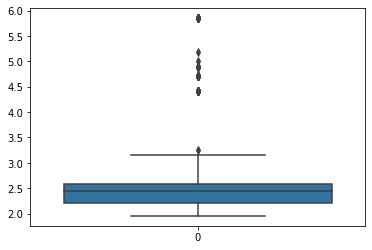

In [5]:
# let's use log to normalize it and see the boxplot more clearly
import numpy as np
import seaborn as sns

a = np.log10(shopify_df['order_amount'].to_list())
ax = sns.boxplot(data=a)


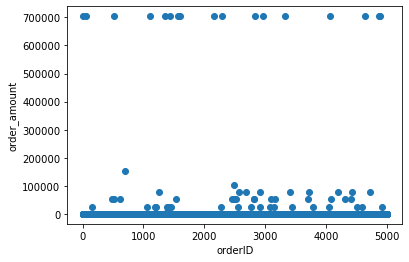

''

In [6]:
# lets' take a look at what informations might be the outliers. 
import matplotlib.pyplot as plt

x = shopify_df.order_id.to_list()
y = shopify_df.order_amount.to_list()
plt.scatter(x, y)
plt.xlabel("orderID")
plt.ylabel("order_amount")
plt.show()

"""
We can get an idea that the outliers are the orders with order amount that is larger than 
200000

"""
;

In [7]:
df_lt20 = shopify_df[shopify_df['order_amount'] > 200000]
df_lt20.sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,3/7/2017 4:00
2297,2298,42,607,704000,2000,credit_card,3/7/2017 4:00
4868,4869,42,607,704000,2000,credit_card,3/22/2017 4:00
4646,4647,42,607,704000,2000,credit_card,3/2/2017 4:00
4056,4057,42,607,704000,2000,credit_card,3/28/2017 4:00
3332,3333,42,607,704000,2000,credit_card,3/24/2017 4:00
2969,2970,42,607,704000,2000,credit_card,3/28/2017 4:00
2835,2836,42,607,704000,2000,credit_card,3/28/2017 4:00
2153,2154,42,607,704000,2000,credit_card,3/12/2017 4:00
60,61,42,607,704000,2000,credit_card,3/4/2017 4:00


### First outlier
We can get that the shop_id is all the same and the user_id is all the same, it looks like user_id 607 has doing some reselling, because every time its purchase is 2000 items. so we can give a reasonable reason that it will not effect most customers' or orders average value

In [8]:
# see how many values in the order_amount, and find the potential outliers
amount_values_num = shopify_df.order_amount.nunique()
amount_values_num

258

# Finding next potential outliers

In [9]:
high_amounts = \
shopify_df.groupby(['order_amount']).size().reset_index(name='times').sort_values(by='order_amount',ascending=False)
high_amounts.head(20)

,order_amount,times
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [10]:
# we find there are still some order_amount that is really large from others, based on the purchasing experience
# I think the order_amount that is larger than 1760 are suspicious
# so lets' take a look at them and see if 
# we can define them as outliers. 
df_lt2000_st704000 = shopify_df[(shopify_df['order_amount'] < 704000) & (shopify_df['order_amount'] > 2000)]
df_lt2000_st704000.sort_values(by="order_amount", ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,3/27/2017 22:51
2492,2493,78,834,102900,4,debit,3/4/2017 4:37
1259,1260,78,775,77175,3,credit_card,3/27/2017 9:27
3724,3725,78,766,77175,3,credit_card,3/16/2017 14:13
2906,2907,78,817,77175,3,debit,3/16/2017 3:45
2690,2691,78,962,77175,3,debit,3/22/2017 7:33
2564,2565,78,915,77175,3,debit,3/25/2017 1:19
4192,4193,78,787,77175,3,credit_card,3/18/2017 9:25
4420,4421,78,969,77175,3,debit,3/9/2017 15:21
3403,3404,78,928,77175,3,debit,3/16/2017 9:45


In [11]:
percentile = (df_lt20.shape[0] + df_lt2000_st704000.shape[0]) / shopify_df.shape[0]

In [12]:
# how many rows of data are their for 2 outliers?
df_lt20.shape[0] + df_lt2000_st704000.shape[0]

63

In [13]:
percentile * 100

1.26

# AOV(Mean), Median, Mode, Most frequant amounts

In [14]:
# it looks like all the orders are from shop with shop_id 78. 
# its shoe's price is way much higher than the rest of 99 shops so we could get rid of it as well.
# 
shopify_df_no_outliers = shopify_df[shopify_df['order_amount'] < 25725]
shopify_df_no_outliers.order_amount.describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

In [15]:
# calculating mode
shopify_df_no_outliers.order_amount.mode()

0    153
dtype: int64

In [16]:
from collections import Counter

c = Counter(shopify_df_no_outliers.order_amount.to_list())
sorted_modes = sorted(c.items(), key=lambda x: x[1],reverse=True)
sorted_modes[:5]

[(153, 87), (306, 85), (354, 82), (156, 75), (160, 75)]

Text(0, 0.5, 'count for order_amount')

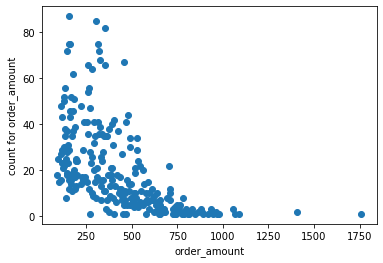

In [17]:
x_no_outliers = [x[0] for x in sorted_modes]
y_count = [x[1] for x in sorted_modes]
plt.scatter(x_no_outliers, y_count)
plt.xlabel("order_amount")
plt.ylabel("count for order_amount")

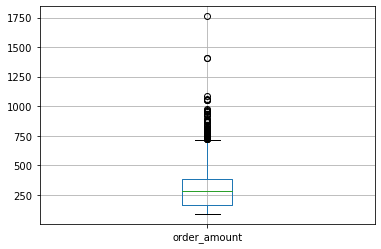

In [18]:
axs = shopify_df_no_outliers.boxplot(column='order_amount')

# top 5 most frequent order_amount

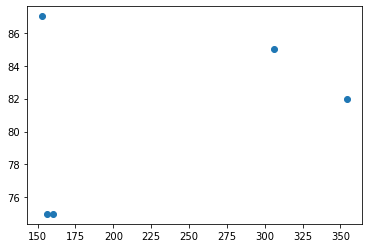

In [19]:
x_sorted_modes = [x[0] for x in sorted_modes[:5]]
y_sorted_modes = [x[1] for x in sorted_modes[:5]]
plt.scatter(x_sorted_modes, y_sorted_modes)
plt.show()

In [20]:
# now with top 5 order_amount in the data sets without outliers, 
'''
Mean = $302
Median = $284
Mode = $153
top_5_order_amount=[(153, 87), (306, 85), (354, 82), (156, 75), (160, 75)]

'''
;

''

# Using interquantile rule to verify

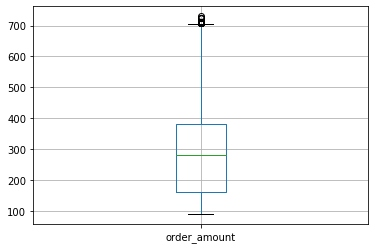

In [21]:
# now shall we use 302 as our AOV? or shall we use 284 as our AOV?
# we can do an verification by using the interquantile rule
q1 = shopify_df.order_amount.quantile(q=0.25)
q2 = shopify_df.order_amount.quantile(q=0.5)
q3 = shopify_df.order_amount.quantile(q=0.75)
IQR = q3 - q1

df_inter_rule = shopify_df[(shopify_df.order_amount < q3 + IQR * 1.5) & (shopify_df.order_amount > q1 - IQR * 1.5)]
df_inter_rule.boxplot(column = 'order_amount')


In [22]:
df_inter_rule.order_amount.describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64